File not found: D:/Geomatics/optimization_tests_computer/250/profile_results_umep.txt
File not found: D:/Geomatics/optimization_tests_computer/500/profile_results_umep.txt
File not found: D:/Geomatics/optimization_tests_computer/1000/profile_results_umep.txt
File not found: D:/Geomatics/optimization_tests_computer/250/profile_results_umep_chm.txt
File not found: D:/Geomatics/optimization_tests_computer/500/profile_results_umep_chm.txt
File not found: D:/Geomatics/optimization_tests_computer/1000/profile_results_umep_chm.txt


C:\Users\Admin\AppData\Local\Temp\ipykernel_31500\3872949181.py:99: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  fig.legend(title="Function", bbox_to_anchor=(1.05, 1), loc="upper left")


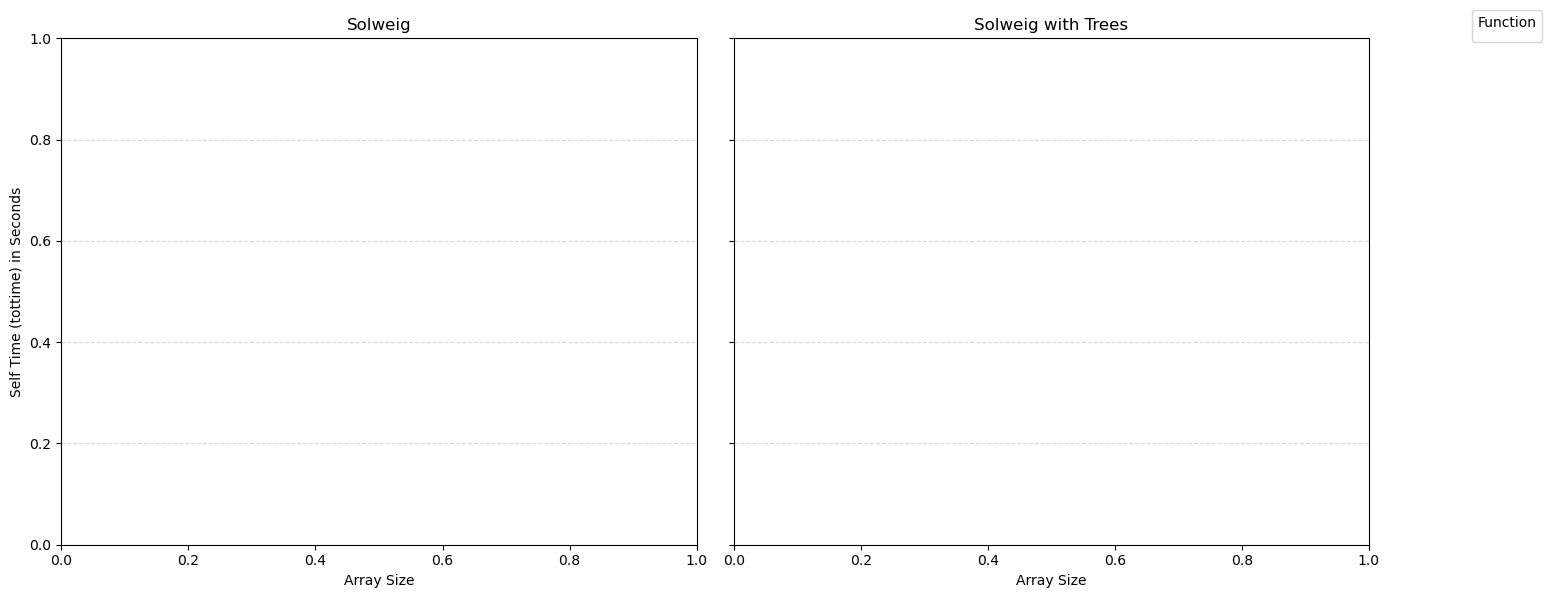

In [4]:
import os
import re
import matplotlib.pyplot as plt
from collections import defaultdict

def process_profile(files, base_dir):
    pattern = re.compile(r'\s*\d+[\d/]*\s+(\S+)\s+\S+\s+(\S+)\s+\S+\s+(.+):\d+\((.+)\)')
    top3_times = defaultdict(list)
    total_times = {}

    for label, filename in files.items():
        path = os.path.join(base_dir, filename)
        if not os.path.exists(path):
            print(f"File not found: {path}")
            continue

        with open(path, 'r', encoding='latin1') as f:
            lines = f.readlines()

        data = []
        max_cumtime = 0
        for line in lines:
            match = pattern.match(line)
            if match:
                tottime = float(match.group(1))
                cumtime = float(match.group(2))
                func_name = match.group(4)
                data.append((tottime, func_name))
                if cumtime > max_cumtime:
                    max_cumtime = cumtime

        total_times[label] = max_cumtime
        top3 = sorted(data, key=lambda x: -x[0])[:3]
        top3_times[label] = top3

    return top3_times, total_times

# Paths and files
base_dir = "D:/Geomatics/optimization_tests_computer/"
files_1 = {
    "250x250": "250/profile_results_umep.txt",
    "500x500": "500/profile_results_umep.txt",
    "1000x1000": "1000/profile_results_umep.txt",
}
files_2 = {
    "250x250": "250/profile_results_umep_chm.txt",
    "500x500": "500/profile_results_umep_chm.txt",
    "1000x1000": "1000/profile_results_umep_chm.txt",
}

# Process both datasets
top3_a, total_a = process_profile(files_1, base_dir)
top3_b, total_b = process_profile(files_2, base_dir)

# Combine all function names to assign consistent colors
all_funcs = {name for v in list(top3_a.values()) + list(top3_b.values()) for _, name in v}
func_colors = dict(zip(all_funcs, plt.cm.tab10.colors[:len(all_funcs)]))
func_colors["Other"] = "lightgrey"

# Prepare subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
titles = ["Solweig", "Solweig with Trees"]
datasets = [(top3_a, total_a), (top3_b, total_b)]

# To track added functions in the legend
added_legend = set()

for ax, (top3, total), title in zip(axs, datasets, titles):
    labels = list(top3.keys())
    bottoms = [0] * len(labels)

    for func in func_colors:
        if func == "Other":
            continue
        values = []
        for label in labels:
            match = next(((time, name) for time, name in top3[label] if name == func), (0, func))
            values.append(match[0])
        ax.bar(labels, values, bottom=bottoms, color=func_colors[func], label=func if func not in added_legend else "")
        bottoms = [b + v for b, v in zip(bottoms, values)]

        # Add function to legend tracking
        if func not in added_legend:
            added_legend.add(func)

    # Add "Other" time
    for i, label in enumerate(labels):
        total_time = total[label]
        top3_total = sum(t for t, _ in top3[label])
        other = max(0, total_time - top3_total)
        ax.bar(label, other, bottom=bottoms[i], color="lightgrey", label="Other" if i == 0 else "")
        ax.text(i, bottoms[i] + other + 0.5, f"Total: {total_time:.1f}s", ha='center', va='bottom', fontsize=9, fontweight='bold')

    ax.set_title(title)
    ax.set_xlabel("Array Size")
    ax.grid(axis='y', linestyle='--', alpha=0.5)

axs[0].set_ylabel("Self Time (tottime) in Seconds")
fig.legend(title="Function", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()



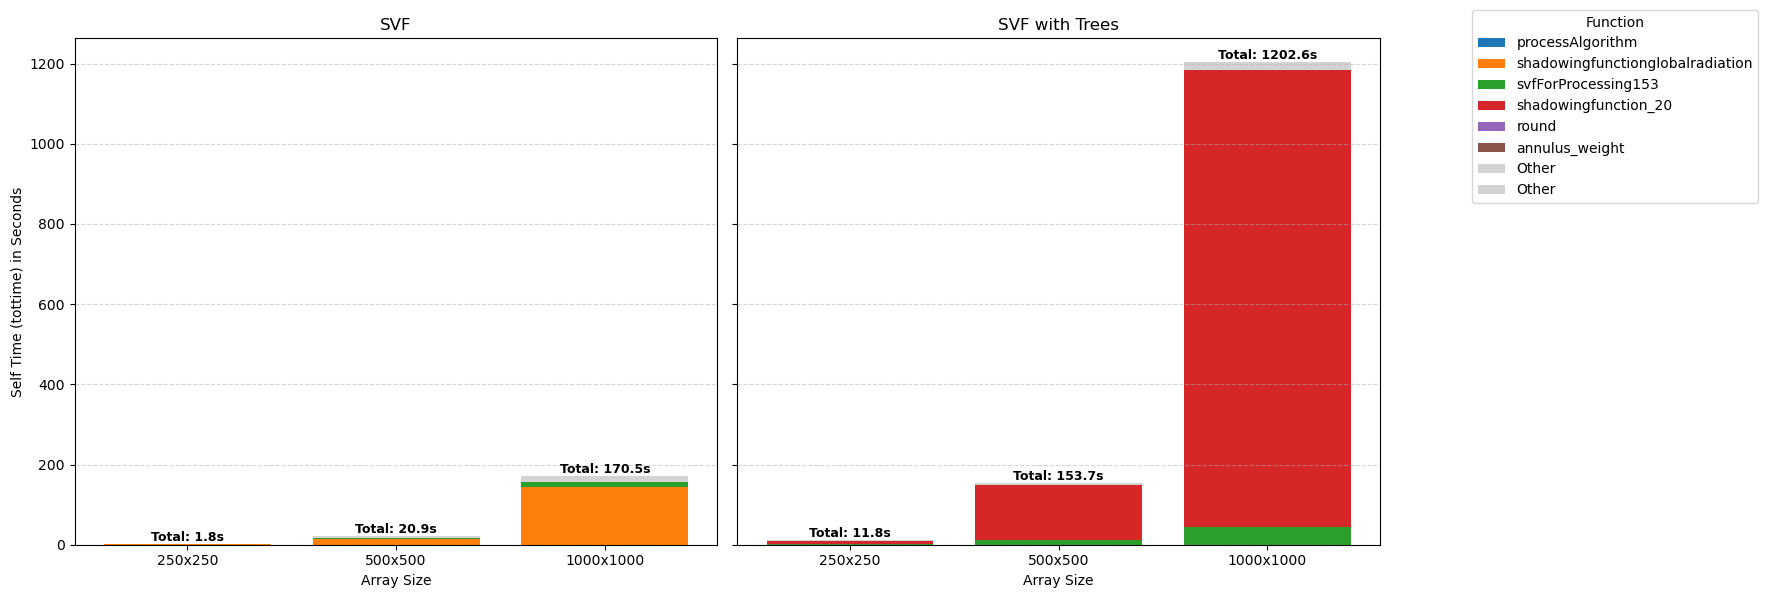

In [14]:
base_dir = "D:/Geomatics/optimization_tests_computer/"
files_1 = {
    "250x250": "250/svf_profile_results_umep.txt",
    "500x500": "500/svf_profile_results_umep.txt",
    "1000x1000": "1000/svf_profile_results_umep.txt",
}
files_2 = {
    "250x250": "250/svf_profile_results_umep_chm.txt",
    "500x500": "500/svf_profile_results_umep_chm.txt",
    "1000x1000": "1000/svf_profile_results_umep_chm.txt",
}

# Process both datasets
top3_a, total_a = process_profile(files_1, base_dir)
top3_b, total_b = process_profile(files_2, base_dir)

# Combine all function names to assign consistent colors
all_funcs = {name for v in list(top3_a.values()) + list(top3_b.values()) for _, name in v}
func_colors = dict(zip(all_funcs, plt.cm.tab10.colors[:len(all_funcs)]))
func_colors["Other"] = "lightgrey"

# Prepare subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
titles = ["SVF", "SVF with Trees"]
datasets = [(top3_a, total_a), (top3_b, total_b)]

# To track added functions in the legend
added_legend = set()

for ax, (top3, total), title in zip(axs, datasets, titles):
    labels = list(top3.keys())
    bottoms = [0] * len(labels)

    for func in func_colors:
        if func == "Other":
            continue
        values = []
        for label in labels:
            match = next(((time, name) for time, name in top3[label] if name == func), (0, func))
            values.append(match[0])
        ax.bar(labels, values, bottom=bottoms, color=func_colors[func], label=func if func not in added_legend else "")
        bottoms = [b + v for b, v in zip(bottoms, values)]

        # Add function to legend tracking
        if func not in added_legend:
            added_legend.add(func)

    # Add "Other" time
    for i, label in enumerate(labels):
        total_time = total[label]
        top3_total = sum(t for t, _ in top3[label])
        other = max(0, total_time - top3_total)
        ax.bar(label, other, bottom=bottoms[i], color="lightgrey", label="Other" if i == 0 else "")
        ax.text(i, bottoms[i] + other + 0.5, f"Total: {total_time:.1f}s", ha='center', va='bottom', fontsize=9, fontweight='bold')

    ax.set_title(title)
    ax.set_xlabel("Array Size")
    ax.grid(axis='y', linestyle='--', alpha=0.5)

axs[0].set_ylabel("Self Time (tottime) in Seconds")
fig.legend(title="Function", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

File not found: D:/Geomatics/optimization_tests_computer/250/profile_results_umep.txt
File not found: D:/Geomatics/optimization_tests_computer/500/profile_results_umep.txt
File not found: D:/Geomatics/optimization_tests_computer/1000/profile_results_umep.txt
File not found: D:/Geomatics/optimization_tests_computer/1500/profile_results_umep.txt
File not found: D:/Geomatics/optimization_tests_computer/2000/profile_results_umep.txt
File not found: D:/Geomatics/optimization_tests_computer/3000/profile_results_umep.txt
File not found: D:/Geomatics/optimization_tests_computer/250/profile_results_cupy.txt
File not found: D:/Geomatics/optimization_tests_computer/500/profile_results_cupy.txt
File not found: D:/Geomatics/optimization_tests_computer/1000/profile_results_cupy.txt
File not found: D:/Geomatics/optimization_tests_computer/1500/profile_results_cupy.txt
File not found: D:/Geomatics/optimization_tests_computer/2000/profile_results_cupy.txt
File not found: D:/Geomatics/optimization_tests

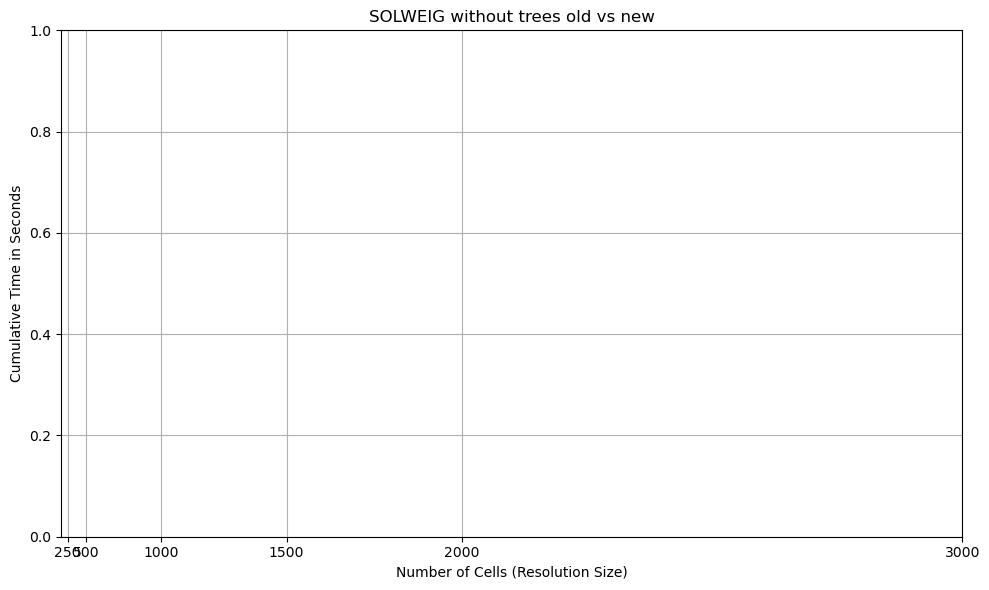

In [5]:
import os
import re
import matplotlib.pyplot as plt
from collections import defaultdict
import itertools

# Function to process each version's data from the profile files
def process_version_files(files_by_version, base_dir):
    pattern = re.compile(r'\s*\d+[\d/]*\s+(\S+)\s+\S+\s+(\S+)\s+\S+\s+(.+):\d+\((.+)\)')
    version_times = defaultdict(dict)  # Store times for each version and resolution

    for version, files in files_by_version.items():
        for filename in files:
            path = os.path.join(base_dir, filename)
            if not os.path.exists(path):
                print(f"File not found: {path}")
                continue

            with open(path, 'r', encoding='latin1') as f:
                lines = f.readlines()

            for line in lines:
                match = pattern.match(line)
                if match:
                    cumtime = float(match.group(2))
                    func_name = match.group(4)
                    resolution = filename.split('/')[0]  # Get resolution from the filename (e.g., '250')

                    # Keep track of the maximum cumtime for the current resolution and version
                    if resolution not in version_times[version]:
                        version_times[version][resolution] = cumtime
                    else:
                        version_times[version][resolution] = max(version_times[version][resolution], cumtime)

    return version_times


# Define the versions and corresponding files
base_dir = "D:/Geomatics/optimization_tests_computer/"

files_by_version = {
    "Version 1": [
        "250/profile_results_umep.txt",
        "500/profile_results_umep.txt",
        "1000/profile_results_umep.txt",
        "1500/profile_results_umep.txt",
        "2000/profile_results_umep.txt",
        "3000/profile_results_umep.txt"
    ],
    "Version 2": [
        "250/profile_results_cupy.txt",
        "500/profile_results_cupy.txt",
        "1000/profile_results_cupy.txt",
        "1500/profile_results_cupy.txt",
        "2000/profile_results_cupy.txt",
        "3000/profile_results_cupy.txt"
    ]
}

# Process data
version_times = process_version_files(files_by_version, base_dir)

# Number of cells for each resolution
cell_counts = {
    "250": 250 * 250,
    "500": 500 * 500,
    "1000": 1000 * 1000,
    "1500": 1500 * 1500,
    "2000": 2000 * 2000,
    "3000": 3000 * 3000,
}

# Plot setup
plt.figure(figsize=(10, 6))

version_colors = {
    "Version 1": "blue",
    "Version 2": "green"
}

# Plotting the cumtimes for each version with fixed colors
for version, times in version_times.items():
    color = version_colors.get(version, 'black')  # Default to black if version not found
    for resolution, cumtime in times.items():
        if resolution in cell_counts:
            num_cells = cell_counts[resolution]
            plt.scatter(num_cells, cumtime, label=f"{version} - {resolution}x{resolution}",
                        s=10, color=color, marker='o')

# Customize plot
plt.xlabel('Number of Cells (Resolution Size)')
plt.ylabel('Cumulative Time in Seconds')
plt.title('SOLWEIG without trees old vs new')
plt.grid(True)

# Add annotations for the points
for version, times in version_times.items():
    for resolution, cumtime in times.items():
        if resolution in cell_counts:
            num_cells = cell_counts[resolution]
            plt.text(num_cells, cumtime, f"{cumtime:.2f}s", fontsize=10, ha='center', va='bottom')

# Adjust x-ticks to match the resolutions
plt.xticks(list(cell_counts.values()), list(cell_counts.keys()))

# Show plot
plt.tight_layout()
plt.show()

File not found: D:/Geomatics/optimization_tests_computer/3000/profile_results_cupy_chm.txt


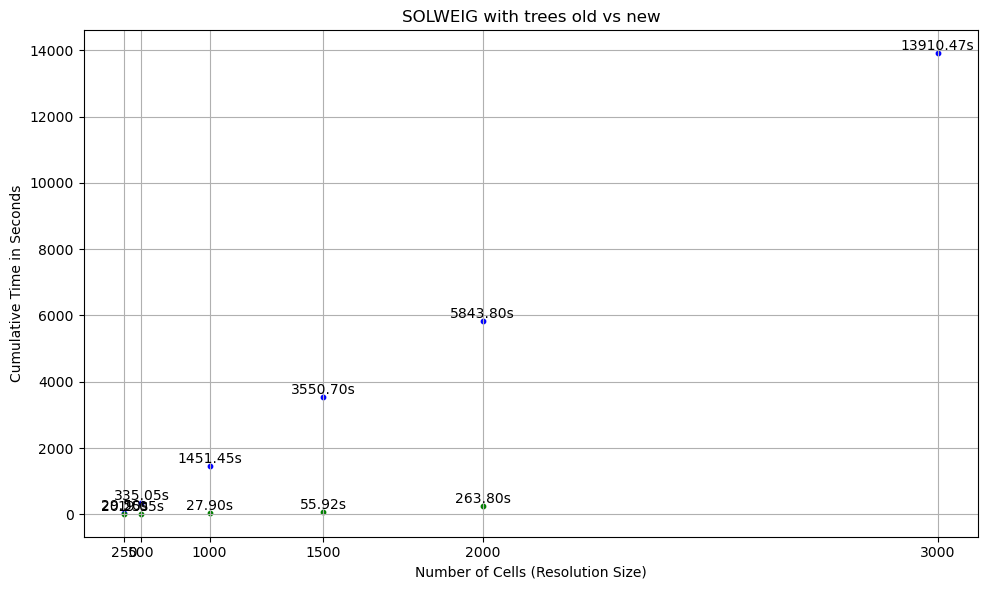

In [26]:
# Define the versions and corresponding files
base_dir = "D:/Geomatics/optimization_tests_computer/"

version1 = 'profile_results_umep_chm.txt'
version2 = 'profile_results_cupy_chm.txt'

files_by_version = {
    "Version 1": [
        f"250/{version1}",
        f"500/{version1}",
        f"1000/{version1}",
        f"1500/{version1}",
        f"2000/{version1}",
        f"3000/{version1}"
    ],
    "Version 2": [
        f"250/{version2}",
        f"500/{version2}",
        f"1000/{version2}",
        f"1500/{version2}",
        f"2000/{version2}",
        f"3000/{version2}"
    ]
}

# Process data
version_times = process_version_files(files_by_version, base_dir)

# Number of cells for each resolution
cell_counts = {
    "250": 250 * 250,
    "500": 500 * 500,
    "1000": 1000 * 1000,
    "1500": 1500 * 1500,
    "2000": 2000 * 2000,
    "3000": 3000 * 3000,
}

# Plot setup
plt.figure(figsize=(10, 6))

version_colors = {
    "Version 1": "blue",
    "Version 2": "green"
}

# Plotting the cumtimes for each version with fixed colors
for version, times in version_times.items():
    color = version_colors.get(version, 'black')  # Default to black if version not found
    for resolution, cumtime in times.items():
        if resolution in cell_counts:
            num_cells = cell_counts[resolution]
            plt.scatter(num_cells, cumtime, label=f"{version} - {resolution}x{resolution}",
                        s=10, color=color, marker='o')

# Customize plot
plt.xlabel('Number of Cells (Resolution Size)')
plt.ylabel('Cumulative Time in Seconds')
plt.title('SOLWEIG with trees old vs new')
plt.grid(True)

# Add annotations for the points
for version, times in version_times.items():
    for resolution, cumtime in times.items():
        if resolution in cell_counts:
            num_cells = cell_counts[resolution]
            plt.text(num_cells, cumtime, f"{cumtime:.2f}s", fontsize=10, ha='center', va='bottom')

# Adjust x-ticks to match the resolutions
plt.xticks(list(cell_counts.values()), list(cell_counts.keys()))

# Show plot
plt.tight_layout()
plt.show()

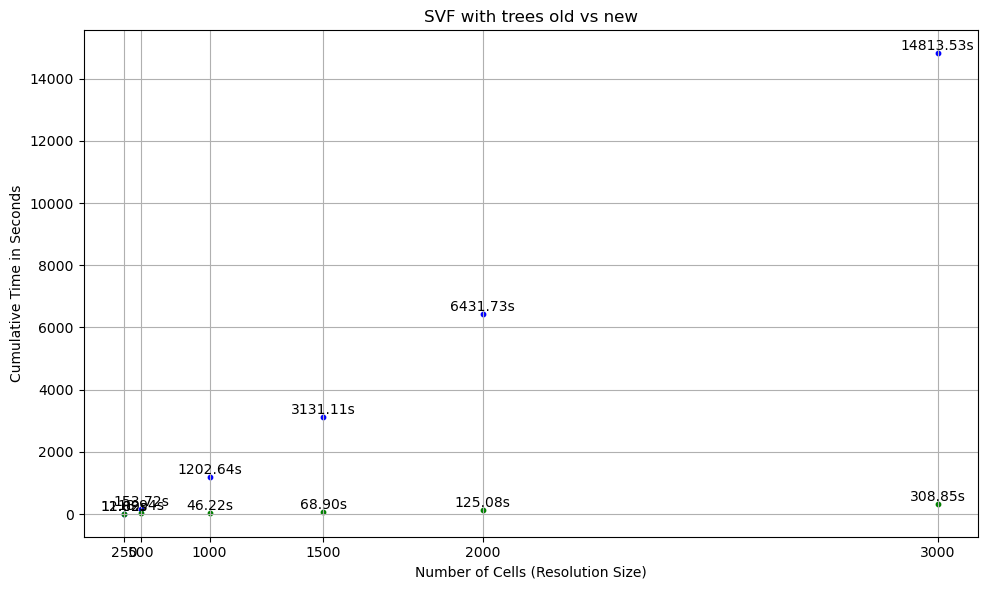

In [27]:
# Define the versions and corresponding files
base_dir = "D:/Geomatics/optimization_tests_computer/"

version1 = 'svf_profile_results_umep_chm.txt'
version2 = 'svf_profile_results_new_chm.txt'

files_by_version = {
    "Version 1": [
        f"250/{version1}",
        f"500/{version1}",
        f"1000/{version1}",
        f"1500/{version1}",
        f"2000/{version1}",
        f"3000/{version1}"
    ],
    "Version 2": [
        f"250/{version2}",
        f"500/{version2}",
        f"1000/{version2}",
        f"1500/{version2}",
        f"2000/{version2}",
        f"3000/{version2}"
    ]
}

# Process data
version_times = process_version_files(files_by_version, base_dir)

# Number of cells for each resolution
cell_counts = {
    "250": 250 * 250,
    "500": 500 * 500,
    "1000": 1000 * 1000,
    "1500": 1500 * 1500,
    "2000": 2000 * 2000,
    "3000": 3000 * 3000,
}

# Plot setup
plt.figure(figsize=(10, 6))

version_colors = {
    "Version 1": "blue",
    "Version 2": "green"
}

# Plotting the cumtimes for each version with fixed colors
for version, times in version_times.items():
    color = version_colors.get(version, 'black')  # Default to black if version not found
    for resolution, cumtime in times.items():
        if resolution in cell_counts:
            num_cells = cell_counts[resolution]
            plt.scatter(num_cells, cumtime, label=f"{version} - {resolution}x{resolution}",
                        s=10, color=color, marker='o')

# Customize plot
plt.xlabel('Number of Cells (Resolution Size)')
plt.ylabel('Cumulative Time in Seconds')
plt.title('SVF with trees old vs new')
plt.grid(True)

# Add annotations for the points
for version, times in version_times.items():
    for resolution, cumtime in times.items():
        if resolution in cell_counts:
            num_cells = cell_counts[resolution]
            plt.text(num_cells, cumtime, f"{cumtime:.2f}s", fontsize=10, ha='center', va='bottom')

# Adjust x-ticks to match the resolutions
plt.xticks(list(cell_counts.values()), list(cell_counts.keys()))

# Show plot
plt.tight_layout()
plt.show()

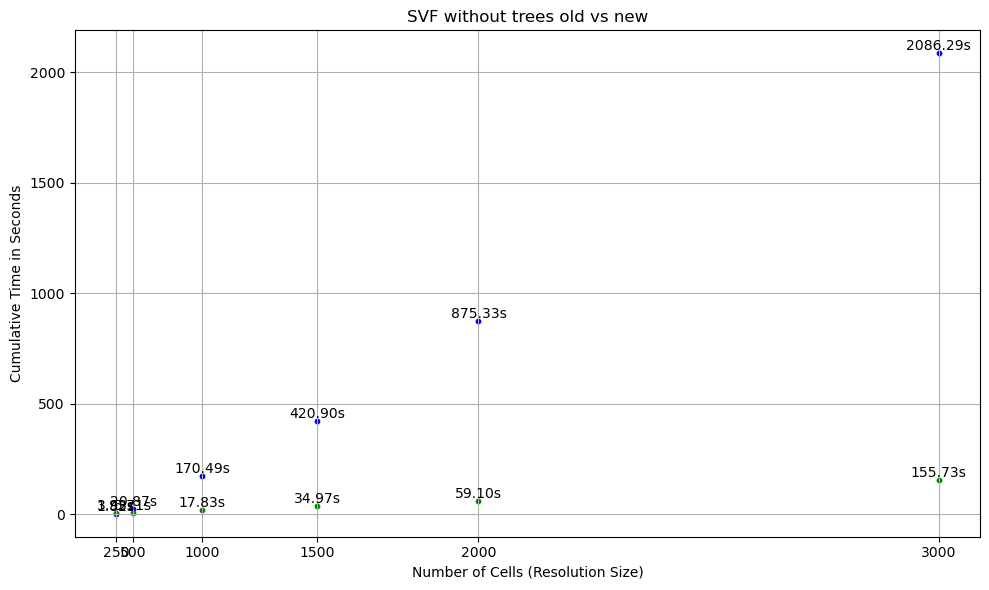

In [28]:
base_dir = "D:/Geomatics/optimization_tests_computer/"

version1 = 'svf_profile_results_umep.txt'
version2 = 'svf_profile_results_new.txt'

files_by_version = {
    "Version 1": [
        f"250/{version1}",
        f"500/{version1}",
        f"1000/{version1}",
        f"1500/{version1}",
        f"2000/{version1}",
        f"3000/{version1}"
    ],
    "Version 2": [
        f"250/{version2}",
        f"500/{version2}",
        f"1000/{version2}",
        f"1500/{version2}",
        f"2000/{version2}",
        f"3000/{version2}"
    ]
}

# Process data
version_times = process_version_files(files_by_version, base_dir)

# Number of cells for each resolution
cell_counts = {
    "250": 250 * 250,
    "500": 500 * 500,
    "1000": 1000 * 1000,
    "1500": 1500 * 1500,
    "2000": 2000 * 2000,
    "3000": 3000 * 3000,
}

# Plot setup
plt.figure(figsize=(10, 6))

version_colors = {
    "Version 1": "blue",
    "Version 2": "green"
}

# Plotting the cumtimes for each version with fixed colors
for version, times in version_times.items():
    color = version_colors.get(version, 'black')  # Default to black if version not found
    for resolution, cumtime in times.items():
        if resolution in cell_counts:
            num_cells = cell_counts[resolution]
            plt.scatter(num_cells, cumtime, label=f"{version} - {resolution}x{resolution}",
                        s=10, color=color, marker='o')

# Customize plot
plt.xlabel('Number of Cells (Resolution Size)')
plt.ylabel('Cumulative Time in Seconds')
plt.title('SVF without trees old vs new')
plt.grid(True)

# Add annotations for the points
for version, times in version_times.items():
    for resolution, cumtime in times.items():
        if resolution in cell_counts:
            num_cells = cell_counts[resolution]
            plt.text(num_cells, cumtime, f"{cumtime:.2f}s", fontsize=10, ha='center', va='bottom')

# Adjust x-ticks to match the resolutions
plt.xticks(list(cell_counts.values()), list(cell_counts.keys()))

# Show plot
plt.tight_layout()
plt.show()

# LAPTOP


File not found: E:/Geomatics/optimization_tests_laptop/2000/svf_profile_results_new_nc.txt
File not found: E:/Geomatics/optimization_tests_laptop/3000/svf_profile_results_new_nc.txt


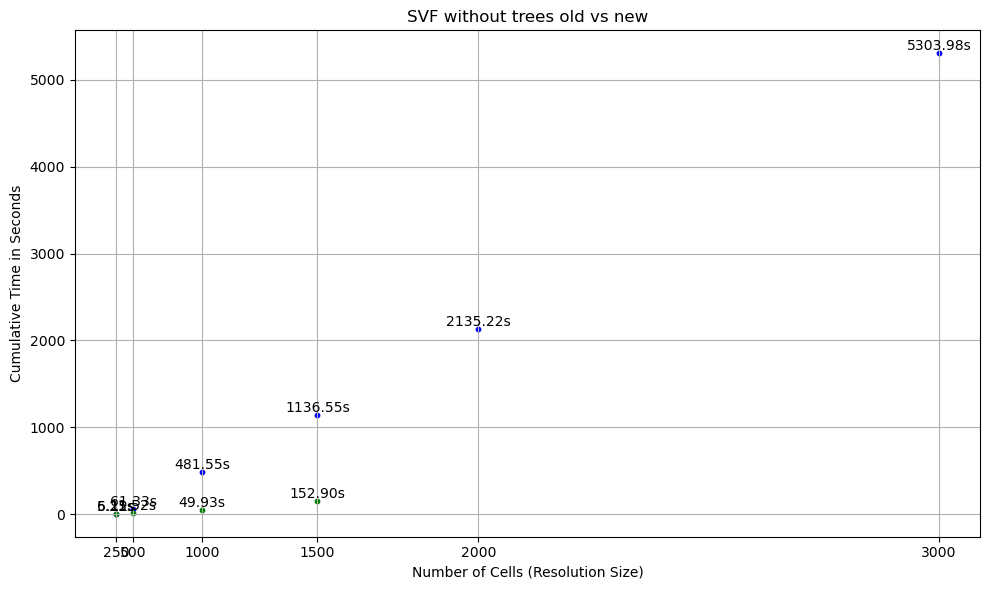

In [7]:
base_dir = "E:/Geomatics/optimization_tests_laptop/"

version1 = 'svf_profile_results_umep.txt'
version2 = 'svf_profile_results_new_nc.txt'

files_by_version = {
    "Version 1": [
        f"250/{version1}",
        f"500/{version1}",
        f"1000/{version1}",
        f"1500/{version1}",
        f"2000/{version1}",
        f"3000/{version1}"
    ],
    "Version 2": [
        f"250/{version2}",
        f"500/{version2}",
        f"1000/{version2}",
        f"1500/{version2}",
        f"2000/{version2}",
        f"3000/{version2}"
    ]
}

# Process data
version_times = process_version_files(files_by_version, base_dir)

# Number of cells for each resolution
cell_counts = {
    "250": 250 * 250,
    "500": 500 * 500,
    "1000": 1000 * 1000,
    "1500": 1500 * 1500,
    "2000": 2000 * 2000,
    "3000": 3000 * 3000,
}

# Plot setup
plt.figure(figsize=(10, 6))

version_colors = {
    "Version 1": "blue",
    "Version 2": "green"
}

# Plotting the cumtimes for each version with fixed colors
for version, times in version_times.items():
    color = version_colors.get(version, 'black')  # Default to black if version not found
    for resolution, cumtime in times.items():
        if resolution in cell_counts:
            num_cells = cell_counts[resolution]
            plt.scatter(num_cells, cumtime, label=f"{version} - {resolution}x{resolution}",
                        s=10, color=color, marker='o')

# Customize plot
plt.xlabel('Number of Cells (Resolution Size)')
plt.ylabel('Cumulative Time in Seconds')
plt.title('SVF without trees old vs new')
plt.grid(True)

# Add annotations for the points
for version, times in version_times.items():
    for resolution, cumtime in times.items():
        if resolution in cell_counts:
            num_cells = cell_counts[resolution]
            plt.text(num_cells, cumtime, f"{cumtime:.2f}s", fontsize=10, ha='center', va='bottom')

# Adjust x-ticks to match the resolutions
plt.xticks(list(cell_counts.values()), list(cell_counts.keys()))

# Show plot
plt.tight_layout()
plt.show()

File not found: E:/Geomatics/optimization_tests_laptop/3000/svf_profile_results_umep_chm.txt
File not found: E:/Geomatics/optimization_tests_laptop/2000/svf_profile_results_new_chm_nc.txt
File not found: E:/Geomatics/optimization_tests_laptop/3000/svf_profile_results_new_chm_nc.txt


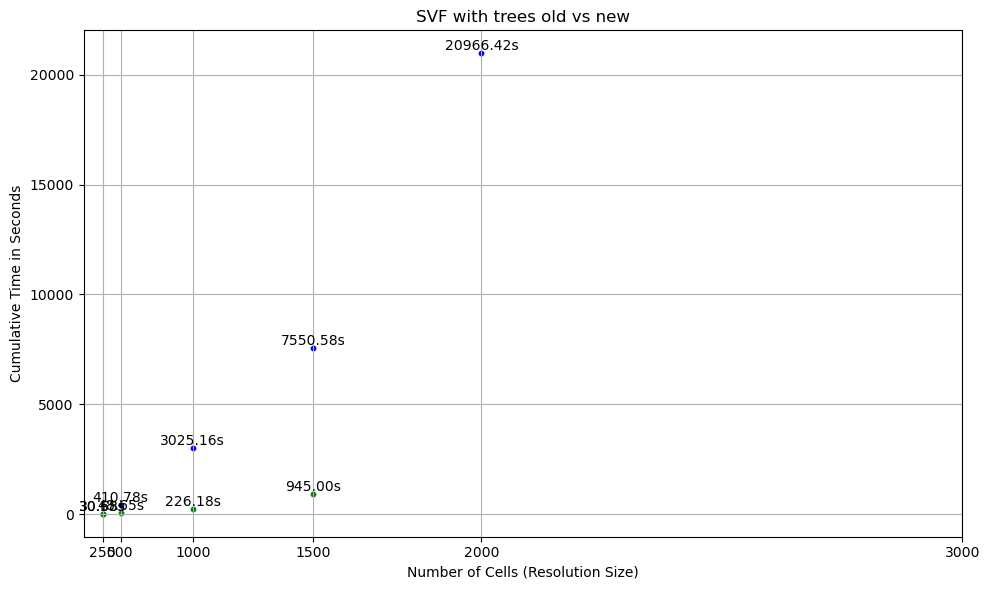

In [8]:
base_dir = "E:/Geomatics/optimization_tests_laptop/"

version1 = 'svf_profile_results_umep_chm.txt'
version2 = 'svf_profile_results_new_chm_nc.txt'

files_by_version = {
    "Version 1": [
        f"250/{version1}",
        f"500/{version1}",
        f"1000/{version1}",
        f"1500/{version1}",
        f"2000/{version1}",
        f"3000/{version1}"
    ],
    "Version 2": [
        f"250/{version2}",
        f"500/{version2}",
        f"1000/{version2}",
        f"1500/{version2}",
        f"2000/{version2}",
        f"3000/{version2}"
    ]
}

# Process data
version_times = process_version_files(files_by_version, base_dir)

# Number of cells for each resolution
cell_counts = {
    "250": 250 * 250,
    "500": 500 * 500,
    "1000": 1000 * 1000,
    "1500": 1500 * 1500,
    "2000": 2000 * 2000,
    "3000": 3000 * 3000,
}

# Plot setup
plt.figure(figsize=(10, 6))

version_colors = {
    "Version 1": "blue",
    "Version 2": "green"
}

# Plotting the cumtimes for each version with fixed colors
for version, times in version_times.items():
    color = version_colors.get(version, 'black')  # Default to black if version not found
    for resolution, cumtime in times.items():
        if resolution in cell_counts:
            num_cells = cell_counts[resolution]
            plt.scatter(num_cells, cumtime, label=f"{version} - {resolution}x{resolution}",
                        s=10, color=color, marker='o')

# Customize plot
plt.xlabel('Number of Cells (Resolution Size)')
plt.ylabel('Cumulative Time in Seconds')
plt.title('SVF with trees old vs new')
plt.grid(True)

# Add annotations for the points
for version, times in version_times.items():
    for resolution, cumtime in times.items():
        if resolution in cell_counts:
            num_cells = cell_counts[resolution]
            plt.text(num_cells, cumtime, f"{cumtime:.2f}s", fontsize=10, ha='center', va='bottom')

# Adjust x-ticks to match the resolutions
plt.xticks(list(cell_counts.values()), list(cell_counts.keys()))

# Show plot
plt.tight_layout()
plt.show()